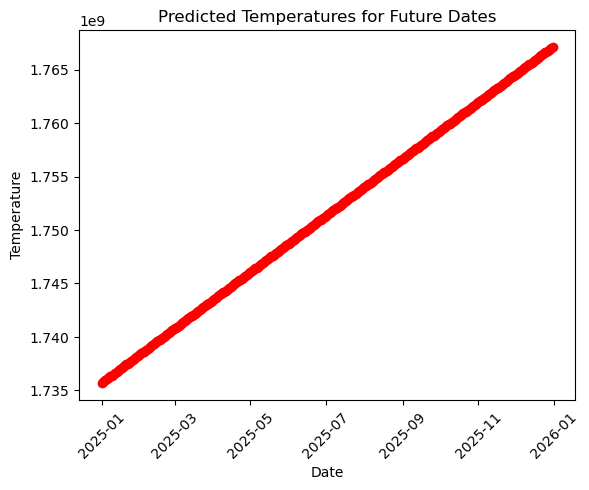

[1.7356896e+09 1.7357760e+09 1.7358624e+09 1.7359488e+09 1.7360352e+09
 1.7361216e+09 1.7362080e+09 1.7362944e+09 1.7363808e+09 1.7364672e+09
 1.7365536e+09 1.7366400e+09 1.7367264e+09 1.7368128e+09 1.7368992e+09
 1.7369856e+09 1.7370720e+09 1.7371584e+09 1.7372448e+09 1.7373312e+09
 1.7374176e+09 1.7375040e+09 1.7375904e+09 1.7376768e+09 1.7377632e+09
 1.7378496e+09 1.7379360e+09 1.7380224e+09 1.7381088e+09 1.7381952e+09
 1.7382816e+09 1.7383680e+09 1.7384544e+09 1.7385408e+09 1.7386272e+09
 1.7387136e+09 1.7388000e+09 1.7388864e+09 1.7389728e+09 1.7390592e+09
 1.7391456e+09 1.7392320e+09 1.7393184e+09 1.7394048e+09 1.7394912e+09
 1.7395776e+09 1.7396640e+09 1.7397504e+09 1.7398368e+09 1.7399232e+09
 1.7400096e+09 1.7400960e+09 1.7401824e+09 1.7402688e+09 1.7403552e+09
 1.7404416e+09 1.7405280e+09 1.7406144e+09 1.7407008e+09 1.7407872e+09
 1.7408736e+09 1.7409600e+09 1.7410464e+09 1.7411328e+09 1.7412192e+09
 1.7413056e+09 1.7413920e+09 1.7414784e+09 1.7415648e+09 1.7416512e+09
 1.741

In [46]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\\Users\\Bryan\\Downloads\\glob_city_temperatures.csv') 

# Define data types for columns
data_types = {'City': str, 'Month': int, 'Day': int, 'Year': int, 'AvgTemperature': float}

# Convert 'Year', 'Month', and 'Day' columns to a datetime object
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Convert datetime to timestamps in seconds
df['Date'] = (df['Date'] - np.datetime64('1970-01-01')) / np.timedelta64(1, 's')

# Drop unnecessary columns
df = df.drop(['State', 'Region', 'Country', 'Day', 'Month', 'Year'], axis=1)

# Extract input features (X) and target variable (y)
X = df.loc[:, ['AvgTemperature']].values
y = df['AvgTemperature'].values

# Create and train the linear regression model
reg = LinearRegression(fit_intercept=True)
reg.fit(X, y)

# Generate future dates for prediction
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')

# Convert future dates to timestamps
future_timestamps = (future_dates - np.datetime64('1970-01-01')) / np.timedelta64(1, 's')

# Convert future timestamps to input features
X_future = np.array(future_timestamps).reshape(-1, 1)

# Make predictions for future dates
predictions = reg.predict(X_future)

# Plot the predicted temperatures
plt.plot(future_dates, predictions, 'ro-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Predicted Temperatures for Future Dates')
plt.xticks(rotation=45)
plt.show()

# Print the predictions
print(predictions)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\\Users\\Bryan\\Downloads\\glob_city_temperatures.csv')

# Define data types for columns
data_types = {'City': str, 'Month': int, 'Day': int, 'Year': int, 'AvgTemperature': float}

# Convert 'Year', 'Month', and 'Day' columns to a datetime object
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop unnecessary columns
df = df.drop(['State', 'Region', 'Country', 'Day', 'Month'], axis=1)

# Filter data for Milan between June 1st and September 30th
df_milan = df[(df['City'] == 'Denver') &
              (df['Date'].dt.month >= 6) &
              (df['Date'].dt.month <= 9) &
              ((df['Date'].dt.month != 6) | (df['Date'].dt.day >= 1)) &
              ((df['Date'].dt.month != 9) | (df['Date'].dt.day <= 30) |
              (df['Year'] != 2020))]

# Extract input features (X) and target variable (y)
X = df_milan['Date'].values.reshape(-1, 1)
y = df_milan['AvgTemperature'].values

# Create and train the linear regression model
reg = LinearRegression(fit_intercept=True)
reg.fit(X, y)

# Predict temperature for July 15th, 2025
prediction_date = pd.to_datetime('2030-07-15')
prediction_timestamp = mdates.date2num(prediction_date)
prediction_temperature = reg.predict([[prediction_timestamp]])

# Print the predicted temperature
print(f"Predicted temperature in Denver on July 15th, 2030: {prediction_temperature[0]} degrees")

Predicted temperature in Denver on July 15th, 2030: 64.59543653370987 degrees


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\\Users\\Bryan\\Downloads\\glob_city_temperatures.csv')

# Define data types for columns
data_types = {'City': str, 'Month': int, 'Day': int, 'Year': int, 'AvgTemperature': float}

# Filter the DataFrame for Milan on July 15th
filtered_df = df[(df['City'] == 'Milan') & (df['Month'] == 7) & (df['Day'] == 15)]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
17095,Europe,Italy,NaN,Milan,7,15,1995,73.6
17459,Europe,Italy,NaN,Milan,7,15,1996,74.3
17824,Europe,Italy,NaN,Milan,7,15,1997,73.0
18189,Europe,Italy,NaN,Milan,7,15,1998,67.2
18549,Europe,Italy,NaN,Milan,7,15,1999,78.2
18915,Europe,Italy,NaN,Milan,7,15,2000,67.3
19280,Europe,Italy,NaN,Milan,7,15,2001,72.6
19641,Europe,Italy,NaN,Milan,7,15,2002,64.8
20006,Europe,Italy,NaN,Milan,7,15,2003,76.8
20372,Europe,Italy,NaN,Milan,7,15,2004,71.9
